# Bonus: Temperature Analysis I

In [1]:
import pandas as pd
from datetime import datetime as dt

In [3]:
# "tobs" is "temperature observations"
df = pd.read_csv('Resources/hawaii_measurements.csv')
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [10]:
# Convert the date column format from string to datetime
df.dtypes

station            object
date       datetime64[ns]
prcp              float64
tobs                int64
dtype: object

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
# Set the date column as the DataFrame index
df = df.set_index('date')

In [21]:
df.columns

Index(['station', 'prcp', 'tobs'], dtype='object')

In [ ]:
# Drop the date column

### Compare June and December data across all years 

In [16]:
from scipy import stats

In [50]:
# Filter data for desired months
# df[df['date'].dt.month_name() == 'June']
df_jun = df.query('index.dt.month in [6]')
df_dec = df.query('index.dt.month in [12]')
df_all = df.query('index.dt.month in [12, 6]')

In [33]:
# Identify the average temperature for June
print(f"The average temperature for June is  {df_jun['tobs'].mean()}")

The average temperature for June is  74.94411764705882


In [34]:
# Identify the average temperature for December
# df_dec['tobs'].mean()
print(f"The average temperature for December is  {df_dec['tobs'].mean()}")


The average temperature for December is  71.04152933421226


In [66]:
# Create collections of temperature data
june = df_jun['tobs']
dec = df_dec['tobs']

In [67]:
june.describe()

count    1700.000000
mean       74.944118
std         3.257417
min        64.000000
25%        73.000000
50%        75.000000
75%        77.000000
max        85.000000
Name: tobs, dtype: float64

In [68]:
dec.describe()

count    1517.000000
mean       71.041529
std         3.745920
min        56.000000
25%        69.000000
50%        71.000000
75%        74.000000
max        83.000000
Name: tobs, dtype: float64

In [70]:
# Run paired t-test
res = stats.ttest_ind(june, dec, equal_var=True)
res

Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

### Analysis

<AxesSubplot:>

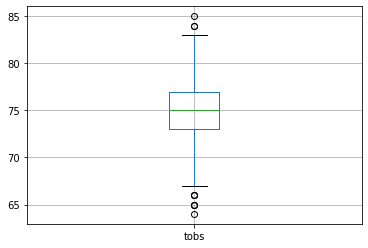

In [64]:
df.query('index.dt.month in [6]').boxplot('tobs')


<AxesSubplot:>

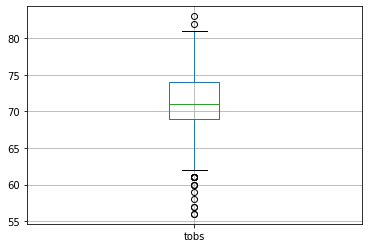

In [65]:
df.query('index.dt.month in [12]').boxplot('tobs')
